# C318 - Engenharias de Software - Inatel
### Grupo
#### Nome: João Vítor Carvalho de Paula Dutra
#### Nome: Raphael Rangel Freitas

## 1) Importação das bibliotecas necessárias


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

## 2) Carregar os dados do arquivo CSV

In [2]:
dados = pd.read_csv('data.csv')

In [3]:
# Visualizar as primeiras linhas do conjunto de dados
dados.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,3,3,7,1,1,3,1,2,1,1
1,4,3,5,1,1,2,2,3,1,1
2,4,3,5,1,1,2,1,2,1,1
3,6,2,4,1,1,2,2,1,1,1
4,4,3,1,1,1,2,2,4,1,1


#### Substituir valores na coluna 'class' por 'yes' ou 'no'

In [4]:
recurrence = ['no', 'yes']
dados["recurrence"] = None
dados.loc[dados["class"] == 1, "recurrence"] = recurrence[0]
dados.loc[dados["class"] == 2, "recurrence"] = recurrence[1]
del dados["class"]
# del dados["id"]

## 3) Análise Exploratória

In [5]:
# Visualização dos primeiros registros e verificação de valores ausentes
print("Primeiras linhas do conjunto de dados:")
print(dados.head())
print("\nValores ausentes no conjunto de dados:")
print(dados.isna().any())

Primeiras linhas do conjunto de dados:
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0    3          3           7          1          1          3       1   
1    4          3           5          1          1          2       2   
2    4          3           5          1          1          2       1   
3    6          2           4          1          1          2       2   
4    4          3           1          1          1          2       2   

   breast-quad  irradiat recurrence  
0            2         1         no  
1            3         1         no  
2            2         1         no  
3            1         1         no  
4            4         1         no  

Valores ausentes no conjunto de dados:
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
recurrence     False
dtype: bool


#### Visualização de dispersão (scatterplot) de 'age' e 'menopause' com base na recorrência


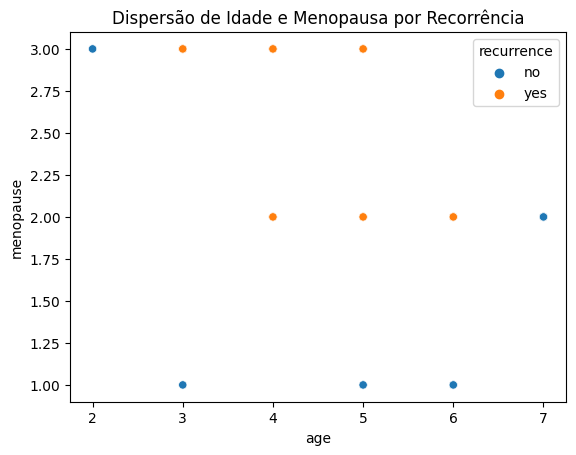

In [6]:
sns.scatterplot(data=dados, x="age", y="menopause", hue="recurrence")
plt.title('Dispersão de Idade e Menopausa por Recorrência')
plt.show()

In [7]:
#sns.pairplot(dados, hue="recurrence")

In [8]:
# Divisão dos dados em conjunto de treino e teste
data = dados.iloc[:, :-1]  # Todas as colunas, exceto a última ('recurrence')
target = dados.iloc[:, -1]  # A coluna 'recurrence'

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data, target, test_size=0.2, random_state=42)
print("Tamanho do conjunto de treino:", len(x_treino))
print("Tamanho do conjunto de teste:", len(x_teste))

Tamanho do conjunto de treino: 221
Tamanho do conjunto de teste: 56


## 4) Criação e Treinamento dos Modelos

In [10]:
# Criação e Treinamento do Modelo Decision Tree
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [11]:
# Criação e Treinamento do Modelo Multilayer Perceptron (MLP)
modelo_mlp = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[200, 80, 100])
modelo_mlp.fit(x_treino, y_treino)

MLPClassifier(hidden_layer_sizes=[200, 80, 100], max_iter=300, random_state=1)

## 5) Avaliação dos Modelos

In [12]:
# Avaliação dos modelos
y_predicao_decision_tree = modelo_decision_tree.predict(x_teste)
y_predicao_mlp = modelo_mlp.predict(x_teste)

In [13]:
# Relatório de Classificação para os modelos
print("Relatório de Classificação para o modelo Decision Tree:")
print(classification_report(y_teste, y_predicao_decision_tree, target_names=recurrence))
print("\nRelatório de Classificação para o modelo Multilayer Perceptron:")
print(classification_report(y_teste, y_predicao_mlp, target_names=recurrence))


Relatório de Classificação para o modelo Decision Tree:
              precision    recall  f1-score   support

          no       0.69      0.78      0.73        37
         yes       0.43      0.32      0.36        19

    accuracy                           0.62        56
   macro avg       0.56      0.55      0.55        56
weighted avg       0.60      0.62      0.61        56


Relatório de Classificação para o modelo Multilayer Perceptron:
              precision    recall  f1-score   support

          no       0.73      0.73      0.73        37
         yes       0.47      0.47      0.47        19

    accuracy                           0.64        56
   macro avg       0.60      0.60      0.60        56
weighted avg       0.64      0.64      0.64        56



In [14]:
# Verificar os rótulos únicos nos conjuntos de teste e previsões para Decision Tree
print("Rótulos únicos em y_teste:", y_teste.unique())
print("Rótulos únicos em y_predicao_decision_tree:", pd.Series(y_predicao_decision_tree).unique())

Rótulos únicos em y_teste: ['no' 'yes']
Rótulos únicos em y_predicao_decision_tree: ['no' 'yes']


In [15]:
# Mapear 'no' para 0 e 'yes' para 1
mapping = {'no': 0, 'yes': 1}
y_teste_numerico = y_teste.map(mapping)
y_predicao_decision_tree_numerico = pd.Series(y_predicao_decision_tree).map(mapping)

# Calcular o recall para a classe relevante
recall = recall_score(y_teste_numerico, y_predicao_decision_tree_numerico)
print("Recall:", recall)


Recall: 0.3157894736842105


In [16]:
# Métricas de avaliação (Acurácia, Matriz de Confusão e Recall)
print("\nMétricas de Avaliação para o modelo Decision Tree:")
print("Acurácia:", accuracy_score(y_teste, y_predicao_decision_tree))
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, y_predicao_decision_tree))
recall = recall_score(y_teste, y_predicao_decision_tree, pos_label='yes')
print("Recall yes:", recall)
recall = recall_score(y_teste, y_predicao_decision_tree, pos_label='no')
print("Recall no:", recall)
precision = precision_score(y_teste, y_predicao_decision_tree, pos_label='yes')
print("Precisão yes:", precision)
precision = precision_score(y_teste, y_predicao_decision_tree, pos_label='no')
print("Precisão no:", precision)




Métricas de Avaliação para o modelo Decision Tree:
Acurácia: 0.625
Matriz de Confusão:
[[29  8]
 [13  6]]
Recall yes: 0.3157894736842105
Recall no: 0.7837837837837838
Precisão yes: 0.42857142857142855
Precisão no: 0.6904761904761905


## 6) Soluções Gráficas para avaliações dos modelos

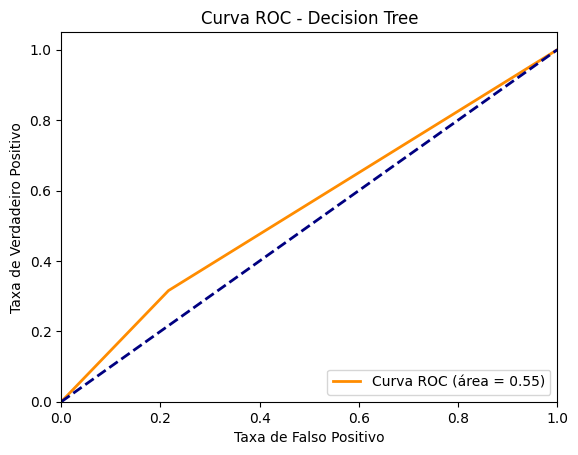

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc


# Converter 'yes' para 1 e 'no' para 0 nos conjuntos de teste e previsões
label_encoder = LabelEncoder()
y_teste_numerico = label_encoder.fit_transform(y_teste)
y_predicao_decision_tree_numerico = label_encoder.transform(y_predicao_decision_tree)

# Calcular as taxas de falso positivo e verdadeiro positivo
fpr, tpr, thresholds = roc_curve(y_teste_numerico, y_predicao_decision_tree_numerico)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()


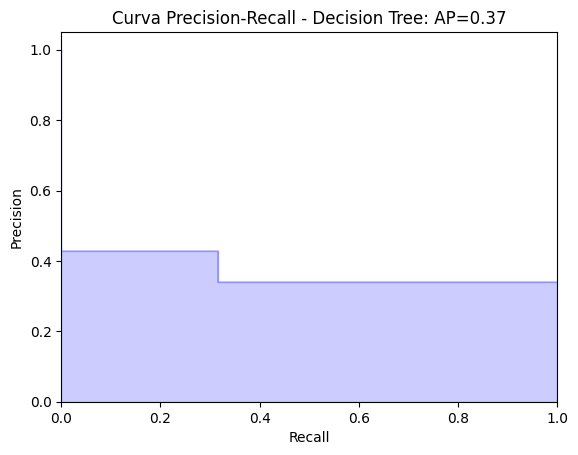

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Converter 'yes' para 1 e 'no' para 0 nos conjuntos de teste e previsões
precision, recall, _ = precision_recall_curve(y_teste_numerico, y_predicao_decision_tree_numerico)
average_precision = average_precision_score(y_teste_numerico, y_predicao_decision_tree_numerico)

# Plotar a curva Precision-Recall
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall - Decision Tree: AP={0:0.2f}'.format(average_precision))
plt.show()


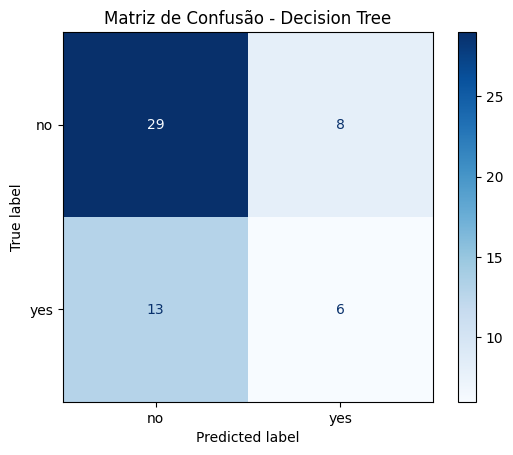

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calcular e plotar a matriz de confusão para o modelo Decision Tree
conf_matrix = confusion_matrix(y_teste_numerico, y_predicao_decision_tree_numerico)
ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title('Matriz de Confusão - Decision Tree')
plt.show()


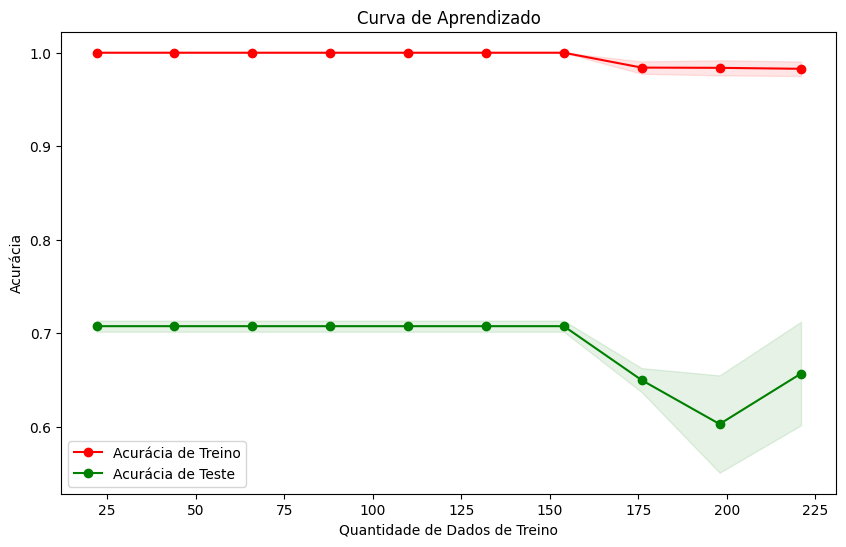

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Definir um modelo, por exemplo, Decision Tree
modelo_decision_tree = DecisionTreeClassifier()

# Calcular curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    modelo_decision_tree, data, target, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular a média e o desvio padrão dos scores de treino e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar curva de aprendizado
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia de Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia de Teste")
plt.xlabel("Quantidade de Dados de Treino")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado")
plt.show()


## 7) Realização de predições com os modelos treinados

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

entrada = input("Entre com os valores de (age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat): ").split(",")
entrada = list(map(int, entrada))
entrada = pd.DataFrame([entrada])

Entre com os valores de (age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat): 4, 3, 4, 1, 2, 3, 2, 1, 1


In [24]:
# Criando o modelo Decision Tree
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(x_treino, y_treino)

# Criando o modelo MLP
modelo_mlp = MLPClassifier()
modelo_mlp.fit(x_treino, y_treino)

# Após treinar os modelos, você pode usá-los para fazer previsões
print(f"Predição Decision Tree: {modelo_decision_tree.predict(entrada)}")
print(f"Predição MLP: {modelo_mlp.predict(entrada)}")

Predição Decision Tree: ['yes']
Predição MLP: ['no']


C:\Users\rapha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\rapha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
